In [1]:
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Prepare data

## Data

In [2]:
data = pd.DataFrame(columns=[
    'Age in decades', 
    'Height (cm)', 
    'Weight (kg)', 
    'Amiodarone', 
    'Enzyme inducer', 
    'Race Asian',
    'Race Black or African American',  
    'Race Caucasian or White', 
    'Race Unknown',
    'CYP2C9 *1/*1',
    'CYP2C9 *1/*2', 
    'CYP2C9 *1/*3', 
    'CYP2C9 *2/*2', 
    'CYP2C9 *2/*3', 
    'CYP2C9 *3/*3',
    'CYP2C9 unknown', 
    'VKORC1 A/A', 
    'VKORC1 A/G', 
    'VKORC1 G/G', 
    'VKORC1 unknown', 
    'dose',
    'type'])

**Explain**

sample = {
'Age in decades': int 2-9 (for adult only),  
'Height (cm)': double 140-200,  
'Weight (kg)': double with bmi in range (16 < $\frac{weight}{height^2} < 30$),  

'Amiodarone': 0-1,  
'Enzyme inducer': 0-1,  

'Race Asian': 0-1,  
'Race Black or African American': 0-1,  
'Race Unknown': 0-1,  
'Race Caucasian or White': 0-1,  
If one race is 1 other 0  

'CYP2C9 *1/*1': 0-1,  
'CYP2C9 *1/*2': 0-1,  
'CYP2C9 *1/*3': 0-1,  
'CYP2C9 *2/*2': 0-1,  
'CYP2C9 *2/*3': 0-1,  
'CYP2C9 *3/*3': 0-1,  
'CYP2C9 unknown': 0-1,  
If one CYP2D9 is 1 other 0

'VKORC1 A/A': 0-1,  
'VKORC1 A/G': 0-1,  
'VKORC1 G/G': 0-1,  
'VKORC1 unknown': 0-1,  
If one VKORC1 is 1 other 0  

'dose': double calc from below function,  
'type': 0 - low, 1 - medium, 2 - high calc from below function  
}

## Calc dose function


In [3]:
def calc_dose(sampl):
    dose = (5.6044 
            - 0.2614 * sampl['Age in decades'] 
            + 0.0087 * sampl['Height (cm)'] 
            + 0.0128 * sampl['Weight (kg)'] 
            - 0.8677 * sampl['VKORC1 A/G'] 
            - 1.6974 * sampl['VKORC1 A/A'] 
            - 0.4854 * sampl['VKORC1 unknown'] 
            - 0.5211 * sampl['CYP2C9 *1/*2'] 
            - 0.9357 * sampl['CYP2C9 *1/*3'] 
            - 1.0616 * sampl['CYP2C9 *2/*2'] 
            - 1.9206 * sampl['CYP2C9 *2/*3'] 
            - 2.3312 * sampl['CYP2C9 *3/*3'] 
            - 0.2188 * sampl['CYP2C9 unknown'] 
            - 0.1092 * sampl['Race Asian'] 
            - 0.2760 * sampl['Race Black or African American'] 
            - 0.1032 * sampl['Race Unknown'] 
            + 1.1816 * sampl['Enzyme inducer'] 
            - 0.5503 * sampl['Amiodarone']
            ) ** 2
    if dose < 21:
        level = 0
    elif 21 <= dose < 49:
        level = 1
    else:
        level = 2
    return dose, level

## Random data function

In [4]:
def create_data():
    sample = {
        'Age in decades': 0,
        'Height (cm)': 0,
        'Weight (kg)': 0,

        'Amiodarone': 0,
        'Enzyme inducer': 0,

        'Race Asian': 0,
        'Race Black or African American': 0,
        'Race Unknown': 0,
        'Race Caucasian or White': 0,

        'CYP2C9 *1/*1': 0,
        'CYP2C9 *1/*2': 0,
        'CYP2C9 *1/*3': 0,
        'CYP2C9 *2/*2': 0,
        'CYP2C9 *2/*3': 0,
        'CYP2C9 *3/*3': 0,
        'CYP2C9 unknown': 0,

        'VKORC1 A/A': 0,
        'VKORC1 A/G': 0,
        'VKORC1 G/G': 0,
        'VKORC1 unknown': 0,

        'dose': 0,
        'type': 0
    }

    sample['Age in decades'] = random.randint(2, 9)
    sample['Height (cm)'] = random.uniform(1.4, 2) * 100
    while not (16 <= sample['Weight (kg)'] / ((sample['Height (cm)'] /100) ** 2) <= 30):
        sample['Weight (kg)'] = random.uniform(31.36, 200)

    sample['Amiodarone'] = random.randint(0, 1)
    sample['Enzyme inducer'] = random.randint(0, 1)

    race = random.randint(0, 12)
    match race:
        case 1|4|7|10:
            sample['Race Asian'] = 1
        case 2|5|8|11:
            sample['Race Black or African American'] = 1
        case 3|6|9|12:
            sample['Race Caucasian or White'] = 1
        case _:
            sample['Race Unknown'] = 1

    cyp2d9 = random.randint(0, 24)
    match cyp2d9:
        case 1|7|13|19:
            sample['CYP2C9 *1/*1'] = 1
        case 2|8|14|20:
            sample['CYP2C9 *1/*2'] = 1
        case 3|9|15|21:
            sample['CYP2C9 *1/*3'] = 1
        case 4|10|16|22:
            sample['CYP2C9 *2/*2'] = 1
        case 5|11|17|23:
            sample['CYP2C9 *2/*3'] = 1
        case 6|12|18|24:
            sample['CYP2C9 *3/*3'] = 1
        case 0:
            sample['CYP2C9 unknown'] = 1

    vkorc1 = random.randint(0, 12)
    match vkorc1:
        case 1|4|7|10:
            sample['VKORC1 A/A'] = 1
        case 2|5|8|11:
            sample['VKORC1 A/G'] = 1
        case 3|6|9|12:
            sample['VKORC1 G/G'] = 1
        case 0:
            sample['VKORC1 unknown'] = 1
            
    sample['dose'], sample['type'] = calc_dose(sample)
    
    return sample
    

## Generate data

In [5]:
dict_data = []
data_size=100000
for i in range(data_size):
    dict_data.append(create_data())
data = data._append(dict_data, ignore_index=True)

In [6]:
print("Age in decades: %.2f ± %.2f"%(data['Age in decades'].mean(), data['Age in decades'].std()))
print("Height (cm): %.2f ± %.2f"%(data['Height (cm)'].mean(), data['Height (cm)'].std()))
print("Weight (kg): %.2f ± %.2f"%(data['Weight (kg)'].mean(), data['Weight (kg)'].std()))
aminodarone = data['Amiodarone'].sum()
print("Amiodarone: %2.2f%% (%d)" %(aminodarone/data_size*100, aminodarone))
inducer = data['Enzyme inducer'].sum()
print("Enzyme inducer: %2.2f%% (%d)" %(inducer/data_size*100, inducer))

Age in decades: 5.49 ± 2.29
Height (cm): 169.97 ± 17.33
Weight (kg): 67.15 ± 18.12
Amiodarone: 49.94% (49936)
Enzyme inducer: 49.91% (49910)


In [7]:
def pct(x):
    return '{:.4f}%\n({:.0f})'.format(x, data_size*x/100)

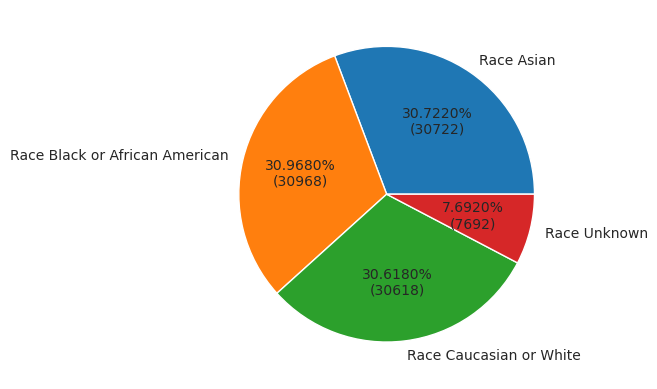

In [8]:
values = [data['Race Asian'].sum(),
          data['Race Black or African American'].sum(),
         data['Race Caucasian or White'].sum(),
          data['Race Unknown'].sum()]
labels = ['Race Asian',
          'Race Black or African American',
          'Race Caucasian or White',
          'Race Unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

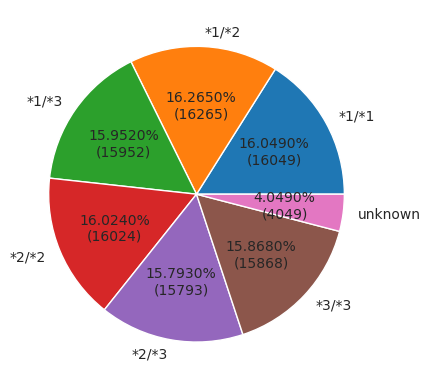

In [9]:
values = [data['CYP2C9 *1/*1'].sum(),
          data['CYP2C9 *1/*2'].sum(), 
          data['CYP2C9 *1/*3'].sum(),
          data['CYP2C9 *2/*2'].sum(), 
          data['CYP2C9 *2/*3'].sum(), 
          data['CYP2C9 *3/*3'].sum(), 
          data['CYP2C9 unknown'].sum()]
labels = ['*1/*1','*1/*2','*1/*3','*2/*2','*2/*3','*3/*3','unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

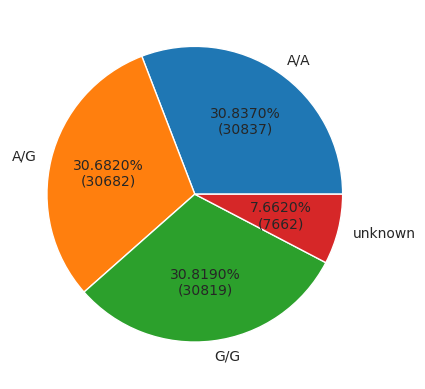

In [10]:
values = [data['VKORC1 A/A'].sum(),
          data['VKORC1 A/G'].sum(), 
          data['VKORC1 G/G'].sum(),
          data['VKORC1 unknown'].sum()]
labels = ['A/A','A/G','G/G','unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

In [11]:
ratio = 0.7
pointer = int(ratio*data_size)
train_set = data.iloc[:pointer,:-2]
test_set = data.iloc[pointer:,:-2]
train_dose = data.iloc[:pointer,-1:].values
test_dose = data.iloc[pointer:,-1:].values

In [12]:
arms = [0, 1, 2]
accuracy = []
A_map = {}
b_map = {}
for arm in arms:
    A_map[arm] = np.identity(len(list(train_set)))
    b_map[arm] = np.zeros(len(list(train_set)))

for epoch in range(200):
    start_time = time.time()
    # train
    indices = np.random.permutation(list(range(len(train_set))))
    for i in indices:
        feature = np.array(train_set.iloc[i], dtype=float)
        # iterate through actions
        p = {}
        max_value = -np.inf
        max_arm = 0
        for arm in arms:
            theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
            p = np.matmul(theta.T, feature) + \
                np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))

            if p == max_value:
                if np.random.choice(a=[False, True]): max_arm = arm
            elif p > max_value:
                max_value = p
                max_arm = arm

        # observe reward and update A and b
        r = 0 if max_arm == train_dose[i] else -1
        A_map[max_arm] += np.outer(feature, feature)
        b_map[max_arm] += r*feature
    
    # test
    correct_count = 0
    count = 0
    higher = 0
    lower = 0
    for i in range(len(test_set)):
        count += 1
        feature = np.array(test_set.iloc[i], dtype=float)
        # iterate through actions
        p = {}
        max_value = -np.inf
        max_arm = 0
        for arm in arms:
            theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
            p = np.matmul(theta.T, feature) + \
                np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))
            if p == max_value:
                if np.random.choice(a=[False, True]): max_arm = arm
            elif p > max_value:
                max_value = p
                max_arm = arm
        
        if max_arm == test_dose[i]:
            correct_count += 1
        elif max_arm < test_dose[i]:
            lower += test_dose[i] - max_arm
        else:
            higher += max_arm - test_dose[i]
            
    end_time = time.time()
    accu = correct_count/count
    print("Epoch %d: Accuracy: %.5f%% (%d/%d), Higher: %d, Lower: %d, Time: %.5fs"%(epoch, accu*100,correct_count,count, higher, lower, end_time-start_time))
    accuracy.append(accu)
    

Epoch 0: Accuracy: 98.75000% (29625/30000), Higher: 166, Lower: 209, Time: 19.66042s
Epoch 1: Accuracy: 98.84000% (29652/30000), Higher: 245, Lower: 103, Time: 19.35832s
Epoch 2: Accuracy: 99.07667% (29723/30000), Higher: 170, Lower: 107, Time: 19.01565s
Epoch 3: Accuracy: 99.13667% (29741/30000), Higher: 118, Lower: 141, Time: 18.51033s
Epoch 4: Accuracy: 99.25000% (29775/30000), Higher: 89, Lower: 136, Time: 18.69996s
Epoch 5: Accuracy: 99.25000% (29775/30000), Higher: 117, Lower: 108, Time: 18.78408s
Epoch 6: Accuracy: 99.07667% (29723/30000), Higher: 166, Lower: 111, Time: 18.80904s
Epoch 7: Accuracy: 99.22333% (29767/30000), Higher: 131, Lower: 102, Time: 18.70058s
Epoch 8: Accuracy: 99.21333% (29764/30000), Higher: 137, Lower: 99, Time: 18.85453s
Epoch 9: Accuracy: 99.28667% (29786/30000), Higher: 127, Lower: 87, Time: 18.63773s
Epoch 10: Accuracy: 99.20667% (29762/30000), Higher: 152, Lower: 86, Time: 18.69296s
Epoch 11: Accuracy: 99.31333% (29794/30000), Higher: 107, Lower: 99,

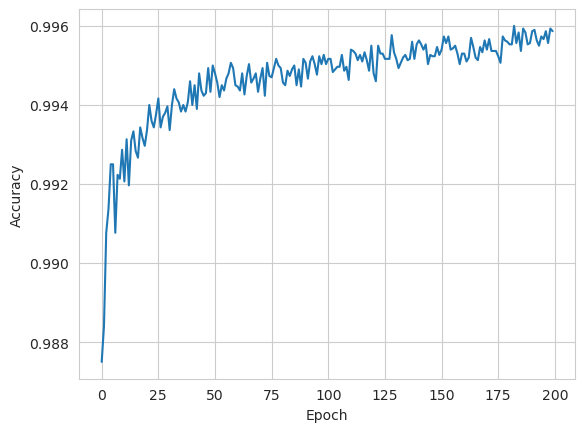

In [13]:
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Validate: Accuracy: 99.64000% (99640/100000)


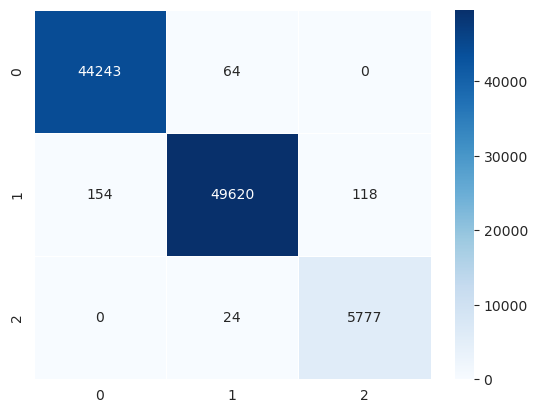

In [14]:
val_set = data.iloc[:,:-2]
val_dose = data.iloc[:,-1:].values
arms = [0, 1, 2]
correct_count = 0
count = 0
heatmap = np.zeros((3,3))

for i in range(len(data)):
    count += 1
    feature = np.array(val_set.iloc[i], dtype=float)
    # iterate through actions
    p = {}
    max_value = -np.inf
    max_arm = 0
    for arm in arms:
        theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
        p = np.matmul(theta.T, feature) + \
            np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))
        if p == max_value:
            if np.random.choice(a=[False, True]): max_arm = arm
        elif p > max_value:
            max_value = p
            max_arm = arm

    if max_arm == val_dose[i]:
        correct_count += 1
    heatmap[max_arm][val_dose[i][0]] += 1

accu = correct_count/count
print("Validate: Accuracy: %.5f%% (%d/%d)"%(accu*100,correct_count,count))
ax = sns.heatmap(heatmap, linewidth=0.5,annot=True,cmap='Blues', fmt='.20g')
plt.show()

# Test real data
## Filter

In [15]:
# https://api.pharmgkb.org/v1/download/submission/553247439
warfarin = pd.read_excel('PS206767-553247439.xls', sheet_name=1)

In [16]:
warfarin_clean = warfarin.loc[:,
                 [
                     'Race (OMB)',
                     'Age',
                     'Height (cm)',
                     'Weight (kg)',
                     
                     # drug
                     'Amiodarone (Cordarone)',
                     ## Enzyme inducer group
                     'Carbamazepine (Tegretol)',
                     'Phenytoin (Dilantin)',
                     'Rifampin or Rifampicin',

                     'VKORC1 -1639 consensus',
                     'CYP2C9 consensus',
                     'Therapeutic Dose of Warfarin', ]]
warfarin_clean = warfarin_clean.dropna(subset=['Height (cm)',
                                               'Weight (kg)',
                                               'Therapeutic Dose of Warfarin', ])

## Convert to ICPC Form

In [17]:
warfarin_clean['Enzyme inducer'] = warfarin_clean[
    ['Carbamazepine (Tegretol)',
     'Phenytoin (Dilantin)',
     'Rifampin or Rifampicin', ]].sum(axis=1)

In [18]:
data = pd.DataFrame(columns=[
    'Age in decades',
    'Height (cm)',
    'Weight (kg)',
    'Amiodarone',
    'Enzyme inducer',
    'Race Asian',
    'Race Black or African American',
    'Race Caucasian or White',
    'Race Unknown',
    'CYP2C9 *1/*1',
    'CYP2C9 *1/*2',
    'CYP2C9 *1/*3',
    'CYP2C9 *2/*2',
    'CYP2C9 *2/*3',
    'CYP2C9 *3/*3',
    'CYP2C9 unknown',
    'VKORC1 A/A',
    'VKORC1 A/G',
    'VKORC1 G/G',
    'VKORC1 unknown',
    'dose',
    'type'])

In [19]:
warfarin_data = []
cyp2c9 = ['*1/*1','*1/*2','*1/*3','*2/*2','*2/*3','*3/*3']

for index, row in warfarin_clean.iterrows():
    sample = {
        'Age in decades': 0,
        'Height (cm)': row['Height (cm)'],
        'Weight (kg)': row['Weight (kg)'],

        'Amiodarone': row['Amiodarone (Cordarone)'],
        'Enzyme inducer': 1 if row['Enzyme inducer'] > 0 else 0,

        'Race Asian': 0,
        'Race Black or African American': 0,
        'Race Unknown': 0,
        'Race Caucasian or White': 0,

        'CYP2C9 *1/*1': 0,
        'CYP2C9 *1/*2': 0,
        'CYP2C9 *1/*3': 0,
        'CYP2C9 *2/*2': 0,
        'CYP2C9 *2/*3': 0,
        'CYP2C9 *3/*3': 0,
        'CYP2C9 unknown': 0,

        'VKORC1 A/A': 0,
        'VKORC1 A/G': 0,
        'VKORC1 G/G': 0,
        'VKORC1 unknown': 0,

        'dose': row['Therapeutic Dose of Warfarin'],
        'type': 0
    }
    try:
        sample['Age in decades'] = int(str(row['Age']).split('-')[0].replace('+',''))/10
    except:
        continue
    match row['Race (OMB)']:
        case 'White':
            sample['Race Caucasian or White'] = 1
        case 'Asian':
            sample['Race Asian'] = 1
        case 'Black or African American':
            sample['Race Black or African American'] = 1
        case 'Unknown':
            sample['Race Unknown'] = 1
    if pd.isnull(row['VKORC1 -1639 consensus']):
        sample['VKORC1 unknown'] = 1
    else:
        sample['VKORC1 '+str(row['VKORC1 -1639 consensus'])] = 1
    if row['CYP2C9 consensus'] not in cyp2c9:
        sample['CYP2C9 unknown'] = 1
    else:
        sample['CYP2C9 '+str(row['CYP2C9 consensus'])] = 1
    if sample['dose'] < 21:
        sample['type'] = 0
    elif 21 <= sample['dose'] < 49:
        sample['type']  = 1
    else:
        sample['type']  = 2
    warfarin_data.append(sample)

data = data._append(warfarin_data, ignore_index=True)

In [20]:
data_size = len(data)
print("Sample:",data_size)
print("Age in decades: %.2f ± %.2f"%(data['Age in decades'].mean(), data['Age in decades'].std()))
print("Height (cm): %.2f ± %.2f"%(data['Height (cm)'].mean(), data['Height (cm)'].std()))
print("Weight (kg): %.2f ± %.2f"%(data['Weight (kg)'].mean(), data['Weight (kg)'].std()))
aminodarone = data['Amiodarone'].sum()
print("Amiodarone: %2.2f%% (%d)" %(aminodarone/data_size*100, aminodarone))
inducer = data['Enzyme inducer'].sum()
print("Enzyme inducer: %2.2f%% (%d)" %(inducer/data_size*100, inducer))

Sample: 4386
Age in decades: 5.94 ± 1.46
Height (cm): 168.13 ± 10.85
Weight (kg): 78.44 ± 22.11
Amiodarone: 4.54% (199)
Enzyme inducer: 1.00% (44)


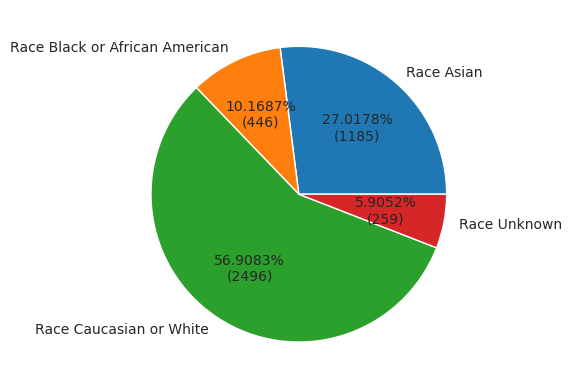

In [21]:
values = [data['Race Asian'].sum(),
          data['Race Black or African American'].sum(),
          data['Race Caucasian or White'].sum(),
          data['Race Unknown'].sum()]
labels = ['Race Asian',
          'Race Black or African American',
          'Race Caucasian or White',
          'Race Unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

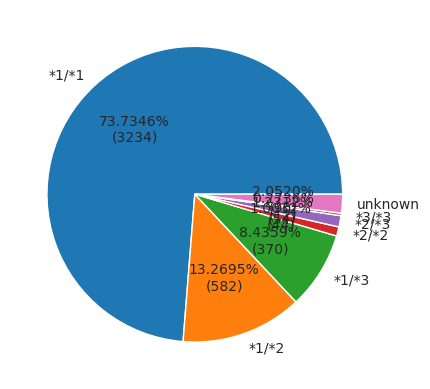

In [22]:
values = [data['CYP2C9 *1/*1'].sum(),
          data['CYP2C9 *1/*2'].sum(),
          data['CYP2C9 *1/*3'].sum(),
          data['CYP2C9 *2/*2'].sum(),
          data['CYP2C9 *2/*3'].sum(),
          data['CYP2C9 *3/*3'].sum(),
          data['CYP2C9 unknown'].sum()]
labels = ['*1/*1','*1/*2','*1/*3','*2/*2','*2/*3','*3/*3','unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

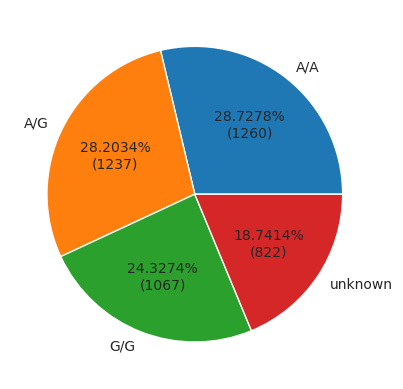

In [23]:
values = [data['VKORC1 A/A'].sum(),
          data['VKORC1 A/G'].sum(),
          data['VKORC1 G/G'].sum(),
          data['VKORC1 unknown'].sum()]
labels = ['A/A','A/G','G/G','unknown']
_ = plt.pie(values,labels=labels,autopct=pct)
plt.show()

In [24]:
val_set = data.iloc[:,:-2]
val_dose = data.iloc[:,-1:].values

Validate: Accuracy: 64.11309% (2812/4386)


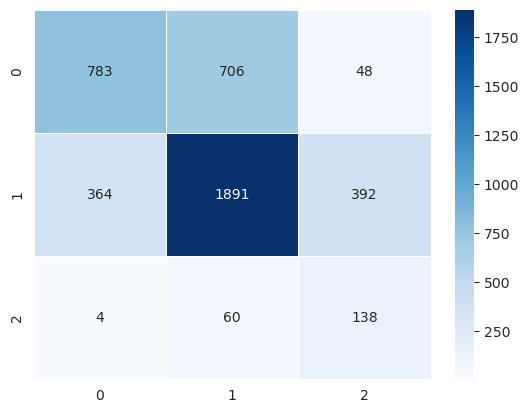

In [25]:
arms = [0, 1, 2]
correct_count = 0
count = 0
heatmap = np.zeros((3,3))

for i in range(len(data)):
    count += 1
    feature = np.array(val_set.iloc[i], dtype=float)
    # iterate through actions
    p = {}
    max_value = -np.inf
    max_arm = 0
    for arm in arms:
        theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
        p = np.matmul(theta.T, feature) + \
            np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))
        if p == max_value:
            if np.random.choice(a=[False, True]): max_arm = arm
        elif p > max_value:
            max_value = p
            max_arm = arm

    if max_arm == val_dose[i]:
        correct_count += 1
    heatmap[max_arm][val_dose[i][0]] += 1

accu = correct_count/count
print("Validate: Accuracy: %.5f%% (%d/%d)"%(accu*100,correct_count,count))
ax = sns.heatmap(heatmap, linewidth=0.5,annot=True,cmap='Blues', fmt='.20g')
plt.show()

In [26]:
correct_count = 0
for index, row in data.iterrows():
    if calc_dose(row)[1] == row['type']:
        correct_count += 1
print("Correct: %f (%d/%d)"%(correct_count/count*100,correct_count,count))

Correct: 53.579571 (2350/4386)
